Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

For each element in the resulting (n,m) matrix, there will be k multiplications and k-1 additions. (k row elements multiplied by k column elements)
So, in total, there will be (n*m*k) multiplications and n*m*(k-1) additions.

Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [86]:
try:
    import time
    import numpy as np
except ImportError:
    !pip install time numpy
    import time
    import numpy as np
# ---------------------------------------


#1. Matrix multiplication using Python's lists
def matrixMultList(a, b):
    result = []
    for i in range(len(a)):
        row = []
        for j in range(len(b[0])):
            val = 0
            for k in range(len(b)):
                val += a[i][k] * b[k][j]
            row.append(val)
        result.append(row)
    return result

# 2. Matrix multiplication using NumPy
def matrixMultNumpy(a, b):
    return np.dot(a, b)

# Generating random matrices
matrixA = np.random.rand(50, 800)
matrixB = np.random.rand(800, 180)

# Calculating the matirx multiplication using method 1 and measuring time
startTime1 = time.time()
resultList = matrixMultList(matrixA.tolist(), matrixB.tolist())
endTime1 = time.time()
method1Time = endTime1 - startTime1

# Calculating the matirx multiplication using method 2 and measuring time
startTime2 = time.time()
resultNumpy = matrixMultNumpy(matrixA, matrixB)
endTime2 = time.time()
method2Time = endTime2 - startTime2

# print("Matrix multiplication result using Python's lists:\n", np.array(resultList))
print("Time taken for Python's list method:", method1Time, "seconds")

# print("\nMatrix multiplication result using NumPy:\n", resultNumpy)
print("Time taken for NumPy method:", method2Time, "seconds")

Time taken for Python's list method: 0.5498065948486328 seconds
Time taken for NumPy method: 0.0 seconds


Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Answer: The aforementioned method, if used, suggests by induction that to calculate the median element, we need to pass over the array at least $n/2$  times (since the median is the middle-most element), and each pass takes $O(n)$ time - Thus the total time complexity of the problem is $O(n*n/2) = O(n^2)$.

A better solution to the problem would be to sort the array, which takes $O(n*\log(n))$ time, and then directly access the $n/2$th element directly in $O(1)$ time. 

The code is given in the block below:

In [78]:
try:
    import time
    import numpy as np
except ImportError:
    !pip install time numpy
    import time
    import numpy as np

# Method 1: Finding Median with n/2 Passes
def medianNPasses(data):
    n = len(data)
    for i in range(n // 2):
        minIdx = i
        for j in range(i + 1, n):
            if data[j] < data[minIdx]:
                minIdx = j
        data[i], data[minIdx] = data[minIdx], data[i]
    if n % 2 == 0:
        return (data[n // 2 - 1] + data[n // 2]) / 2
    else:
        return data[n // 2]

# Method 2: Using numpy.median()
def medianNumpy(data):
    return np.median(data)

# Generating a sample array of numbers
arraySize = 7000
sampleArray = np.random.rand(arraySize)

startTime1 = time.time()
median1 = medianNPasses(sampleArray.copy())
endTime1 = time.time()
method1Time = endTime1 - startTime1

startTime2 = time.time()
median2 = medianNumpy(sampleArray.copy())
endTime2 = time.time()
method2Time = endTime2 - startTime2

# print("Median calculated using n/2 passes method:", median1)
print("Time taken for n/2 passes method:", method1Time, "seconds")

# print("\nMedian calculated using NumPy's median method:", median2)
print("Time taken for NumPy's median method:", method2Time, "seconds")


Time taken for n/2 passes method: 3.584594488143921 seconds
Time taken for NumPy's median method: 0.0005064010620117188 seconds


Q4.What is the gradient of the following function with respect to x and y? 
$$    x^2y+y^3\sin(x)
$$

With respect to x, gradient is:
$$
df/dx = 2xy + y^3\cos(x)
$$

With respect to y, gradient is:
$$
df/dy = x^2 + 3y^2\sin(x)
$$

Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [39]:
# using JAX, gradient evaluated:
try:
    import numpy as np
    import jax
    import jax.numpy as jnp
except ImportError:
    !pip install numpy jax jaxlib
    import numpy as np
    import jax
    import jax.numpy as jnp
# -------------------------------------------------------

def f(x):
    return x[0]**2 * x[1] + x[1]**3 * jnp.sin(x[0])

# analytical gradients
def gradX(x):
    return 2 * x[0] * x[1] + x[1]**3 * jnp.cos(x[0])

def gradY(x):
    return x[0]**2 + 3 * x[1]**2 * jnp.sin(x[0])

# jax gradient
gradientF = jax.grad(f)

# xVal = [1.0,2.0,3.0,4.0,5.0]
# yVal = [3.0,5.0,7.0,8.0,9.0]

inputVariables = jnp.array([xVal, yVal])

# jaxGradient = gradientF(inputVariables)
jaxGradients = []
print("JAX Gradients:")
for x, y in zip(xVal, yVal):
    jaxGradient = gradientF(jnp.array([x, y]))
    jaxGradients.append(jaxGradient)
    print(f"{jaxGradient}")

jaxGradients = jnp.array(jaxGradients)

# analyticalGradient = jnp.array(gradX(inputVariables), gradY(inputVariables) )
analyticalX = gradX(inputVariables)
analyticalY = gradY(inputVariables)

analyticalGradients = jnp.stack([analyticalX, analyticalY])

# print("JAX Gradients:", jaxGradient)
print("Analytical Gradients:\n", analyticalGradients)


JAX Gradients:
[20.588161 23.719715]
[-32.018356  72.1973  ]
[-297.5674    29.74464]
[-270.66553 -129.30608]
[ 296.78973 -208.0186 ]
Analytical Gradients:
 [[  20.588161  -32.018356 -297.5674   -270.66553   296.78973 ]
 [  23.719715   72.1973     29.74464  -129.30608  -208.0186  ]]


Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [44]:
try:
    from sympy import symbols, diff, sin
except ImportError:
    !pip install sympy
    from sympy import symbols, diff, sin

# Define the symbol
x = symbols('x')

# Define the function f(x)
f = x**2 * symbols('y') + symbols('y')**3 * sin(x)

# Calculate the partial derivatives with respect to x and y
xPartialDerivative = diff(f, x)
yPartialDerivative = diff(f, symbols('y'))

print("Partial derivative with respect to x:", xPartialDerivative)
print("Partial derivative with respect to y:", yPartialDerivative)


Partial derivative with respect to x: 2*x*y + y**3*cos(x)
Partial derivative with respect to y: x**2 + 3*y**2*sin(x)


Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks


In [32]:
myMarksDict = {
    '2022':{
        'ComputerScience':{
            'rollNumber':'22110001', 'fullName': 'Arvind', 'marksObtained':{
                'english':'10',
                'maths':'100'
                # add appropriate subjects as necessary
            } 
        },
        'ElectricalicalEngineering':{},
        # fill in the appropriate engineering fields as required.
        # add appropirate subjects as required
    },
    '2023':{},
    '2024':{},
    '2025':{}
    # add appropriate years as required
}

Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [87]:
class Student:
    def __init__(self, rollNumber, fullName):
        self.rollNumber = rollNumber
        self.fullName = fullName
        self.marksObtained = {}

    def addMark(self, subject, mark):
        self.marksObtained[subject] = mark

class Branch:
    def __init__(self, branchName):
        self.branchName = branchName
        self.students = []

    def addStudent(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def addBranch(self, branch):
        self.branches.append(branch)

# Creating instances of the classes and adding data
year2022 = Year('2022')

compSci = Branch('ComputerScience')
compSciStudent = Student('22110001', 'Arvind')
compSciStudent.addMark('english', '10')
compSciStudent.addMark('maths', '100')
compSci.addStudent(compSciStudent)

elecEng = Branch('ElectricalEngineering')
# Add students or details for ElectricalEngineering as needed

year2022.addBranch(compSci)
year2022.addBranch(elecEng)

# Creating a database as a list of year objects
database = [year2022, Year('2023'), Year('2024'), Year('2025')]
# Add more years or modify data as needed


for year in database:
    print(f"Year: {year.year}")
    for branch in year.branches:
        print(f"\tBranch: {branch.branchName}")
        for student in branch.students:
            print(f"\t\tStudent: {student.fullName} - Roll Number: {student.rollNumber}")
            print("\t\t\tMarks:")
            for subject, mark in student.marksObtained.items():
                print(f"\t\t\t\t{subject}: {mark}")
# Add required classes to the database object as required using the class methods and check by printing

Year: 2022
	Branch: ComputerScience
		Student: Arvind - Roll Number: 22110001
			Marks:
				english: 10
				maths: 100
	Branch: ElectricalEngineering
Year: 2023
Year: 2024
Year: 2025


Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

$$
y = x
$$
$$
y = x^2
$$
$$
y = \frac{x^3}{100}
$$
$$
y = \sin(x)
$$
$$
y = \frac{\sin(x)}{x}
$$
$$
y = \log(x)
$$
$$
y = e^x
$$

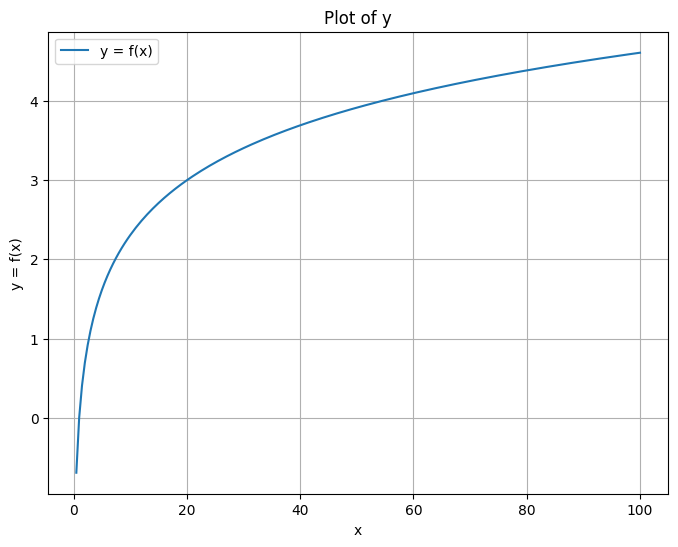

In [56]:
try:
    import matplotlib.pyplot as plt
    import numpy as np
except ImportError:
    !pip install matplotlib numpy
    import matplotlib.pyplot as plt
    import numpy as np

# Different functions of x - activate as you like
def f(x):
    # return x
    # return x**2
    # return 0.001*x**3
    # return np.sin(x)
    # return np.sin(x) / x  
    return np.log(x)
    # return np.exp(x)

# Defining the domain
xValues = np.arange(0.5, 100.1, 0.5)

# Calculate the corresponding function values
yValues = f(x_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(xValues, yValues, label = "y = f(x)" )  
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('Plot of y')
plt.legend()
plt.grid(True)
plt.show()


Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [80]:
try:
    import numpy as np
    import pandas as pd
except ImportError:
    !pip install numpy pandas
    import numpy as np
    import pandas as pd
# The above code installs modules if any installation error occurs

# Q10
# -------------------------------------------------------------------------------------------
randomMatrix = np.random.uniform(low = 1, high = 2, size = (20,5))
# the above code generates a matrix, of size 20x5, with numbers between (1,2).
# print(randomMatrix)

dataFrame = pd.DataFrame(randomMatrix, columns=['a', 'b', 'c', 'd', 'e'])
# print(dataFrame)
columnStandardDeviation = dataFrame.std()
# print(columnStandardDeviation)
highestDeviation = columnStandardDeviation.idxmax()
print(f"Column with highest deviation is: {highestDeviation}")
# prinst the required column with highest deviation 

rowMean = dataFrame.mean(axis = 1)
lowestMean = rowMean.idxmin()
print(f"Row number with lowest deviation is: {lowestMean}")
# similar method as above implemented to find lowest mean row


# Q11
#-------------------------------------------------------------------------------------------

# Task 1: Add a new column 'f' as the sum of columns 'a', 'b', 'c', 'd', 'e'
dataFrame['f'] = dataFrame[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Task 2: Create column 'g' with 'LT8' if 'f' < 8 else 'GT8'
dataFrame['g'] = np.where(dataFrame['f'] < 8, 'LT8', 'GT8')

# Task 3: Count rows where 'g' is 'LT8'
LT8Count = (dataFrame['g'] == 'LT8').sum()

# Task 4: Finding the standard deviation of column 'f' for 'LT8' and 'GT8' rows respectively
stdLT8 = dataFrame[dataFrame['g'] == 'LT8']['f'].std()
stdGT8 = dataFrame[dataFrame['g'] == 'GT8']['f'].std()

# Displaying the results
print("DataFrame with new columns 'f' and 'g':")
print(dataFrame)


print(f"Number of rows where 'g' is 'LT8': {LT8Count}")


print(f"Standard deviation of column 'f' for 'LT8': {stdLT8}")
print(f"Standard deviation of column 'f' for 'GT8': {stdGT8}")



Column with highest deviation is: c
Row number with lowest deviation is: 8
DataFrame with new columns 'f' and 'g':
           a         b         c         d         e         f    g
0   1.922546  1.413657  1.495244  1.263682  1.959051  8.054180  GT8
1   1.570954  1.668115  1.402700  1.879534  1.010796  7.532099  LT8
2   1.702653  1.172401  1.410717  1.034864  1.482974  6.803609  LT8
3   1.657213  1.805520  1.246527  1.354241  1.635431  7.698931  LT8
4   1.926123  1.066135  1.773882  1.760074  1.595369  8.121582  GT8
5   1.325206  1.102780  1.081174  1.639739  1.397056  6.545955  LT8
6   1.603777  1.351663  1.914076  1.347994  1.742321  7.959832  LT8
7   1.229164  1.088984  1.966617  1.722506  1.873082  7.880352  LT8
8   1.043291  1.181569  1.423575  1.082499  1.062737  5.793670  LT8
9   1.727860  1.385016  1.822359  1.259766  1.732698  7.927699  LT8
10  1.311795  1.437563  1.711885  1.250431  1.772939  7.484613  LT8
11  1.182294  1.357443  1.821472  1.676232  1.372277  7.409718  LT8
1

Q12.Write a small piece of code to explain broadcasting in numpy.

In [81]:
try:
    import numpy as np
except ImportError:
    !pip install numpy
    import numpy as np

# Example 1: Broadcasting a scalar to an array
arr = np.array([[1, 2, 3], [4, 5, 6]])
scalar = 15

resultScalarBroadcast = arr + scalar

print("Example 1 - Broadcasting a scalar to an array:")
print(resultScalarBroadcast)
print()
# added the scalar to each element of the present array

# Example 2: Broadcasting arrays of different shapes
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([10, 20, 30])
# added the second array element-wise to each element of the previous two arrays

resultShapeBroadcast = arr1 + arr2
print("Example 2 - Broadcasting arrays of different shapes:")
print(resultShapeBroadcast)
print()

# Example 3: Broadcasting arrays with different dimensions
arr3 = np.array([[1, 2, 3]])
arr4 = np.array([[10], [20]])

resultDimensionBroadcast = arr3 + arr4
print("Example 3 - Broadcasting arrays with different dimensions:")
print(resultDimensionBroadcast)
# resulting afrray is a combination of the sizes of arrays that are added 

Example 1 - Broadcasting a scalar to an array:
[[16 17 18]
 [19 20 21]]

Example 2 - Broadcasting arrays of different shapes:
[[11 22 33]
 [14 25 36]]

Example 3 - Broadcasting arrays with different dimensions:
[[11 12 13]
 [21 22 23]]


Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.



In [84]:
try:
    import numpy as np
except ImportError:
    !pip install numpy
    import numpy as np

def computeArgmin(arr):
    minIndex = 0  # Initialise index of minimum element
    minVal = arr[0]  # Initialise minimum value with first element

    # Loop through the array to find the minimum value and its index
    for i in range(1, len(arr)):
        if arr[i] < minVal:
            minVal = arr[i]
            minIndex = i

    return minIndex

# Test the function with a NumPy array emthods
numpyArray = np.array([7, 2, 9, 1, 5])
argminIndex = computeArgmin(numpyArray)

print("Index of the minimum element using our function:", argminIndex)
print("Verifying with np.argmin() function:", np.argmin(numpyArray))


Index of the minimum element using our function: 3
Verifying with np.argmin() function: 3
